In [57]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [2]:
file_path=("insurance.csv")
insurance_df=pd.read_csv(file_path)
insurance_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
insurance_df=insurance_df.dropna()
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [4]:
insurance_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
import random
import string

# Define a function to generate random IDs
def generate_random_id():
    alphabet = string.ascii_uppercase + string.digits
    return ''.join(random.choice(alphabet) for i in range(6))

# Add a new column to the data frame with random IDs
insurance_df['ID'] = [generate_random_id() for _ in range(len(insurance_df))]
#backup
insured_df=insurance_df

insurance_df.head()


age     sex     bmi  children smoker     region      charges      ID
0   19  female  27.900         0    yes  southwest  16884.92400  LFL038
1   18    male  33.770         1     no  southeast   1725.55230  ZNOWKZ
2   28    male  33.000         3     no  southeast   4449.46200  OIOJPO
3   33    male  22.705         0     no  northwest  21984.47061  F4LI85
4   32    male  28.880         0     no  northwest   3866.85520  ZFVE8D

In [6]:
df1 = insurance_df.loc[:, ["ID", "age", "sex", "bmi", "children","smoker"]]
df1.head()

ID  age     sex     bmi  children smoker
0  LFL038   19  female  27.900         0    yes
1  ZNOWKZ   18    male  33.770         1     no
2  OIOJPO   28    male  33.000         3     no
3  F4LI85   33    male  22.705         0     no
4  ZFVE8D   32    male  28.880         0     no

In [7]:
df2 = insurance_df.loc[:, ["ID","region", "charges"]]
df2.head()

ID     region      charges
0  LFL038  southwest  16884.92400
1  ZNOWKZ  southeast   1725.55230
2  OIOJPO  southeast   4449.46200
3  F4LI85  northwest  21984.47061
4  ZFVE8D  northwest   3866.85520

In [8]:
# Write the data frame to a CSV file
#df1.to_csv('insurance_info.csv', index=False)
#df2.to_csv('insurance_charges.csv', index=False)

In [9]:
# Statistics and Data Exploration

In [10]:
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
insurance_df.groupby(['sex']).mean()

age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.917160  30.943129  1.115385  13956.751178

In [12]:
insurance_df.groupby(['children']).mean()

age        bmi       charges
children                                    
0         38.444251  30.550296  12365.975602
1         39.453704  30.623148  12731.171832
2         39.445833  30.978104  15073.563734
3         41.566879  30.684331  15355.318367
4         39.000000  31.391200  13850.656311
5         35.611111  29.605000   8786.035247

In [13]:
insurance_df.groupby(['smoker']).mean()

age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832

In [14]:
insurance_df.groupby(['region']).mean()

age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377

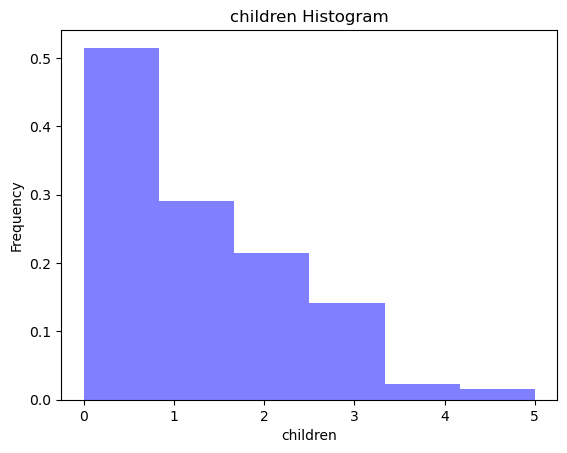

In [15]:
plt.hist(insurance_df["children"], bins=6, density=True, alpha=0.5, color='blue')

# add labels and title
plt.xlabel('children')
plt.ylabel('Frequency')
plt.title('children Histogram')

# show the plot
plt.show()

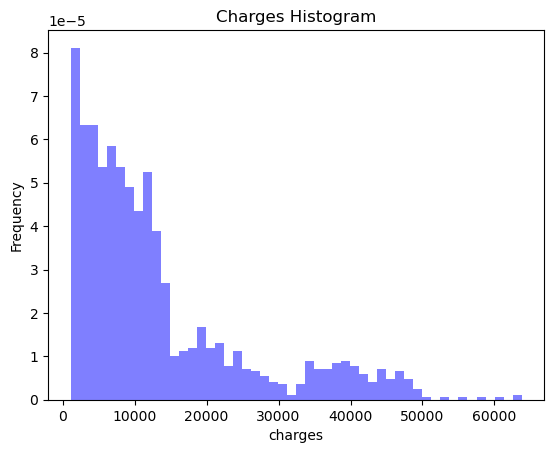

In [16]:
plt.hist(insurance_df["charges"], bins=50, density=True, alpha=0.5, color='blue')

# add labels and title
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.title('Charges Histogram')

# show the plot
plt.show()

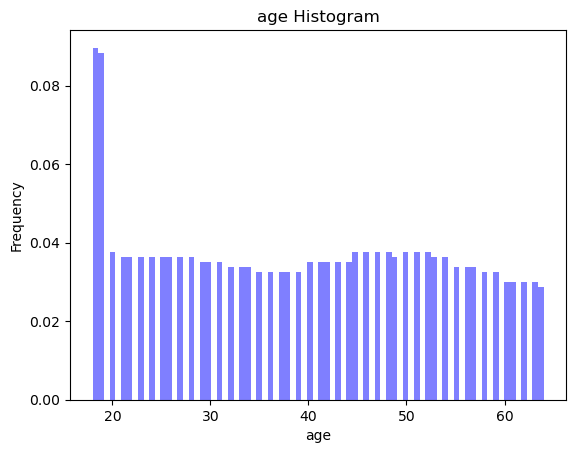

In [17]:
plt.hist(insurance_df["age"], bins=80, density=True, alpha=0.5, color='blue')

# add labels and title
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age Histogram')

# show the plot
plt.show()

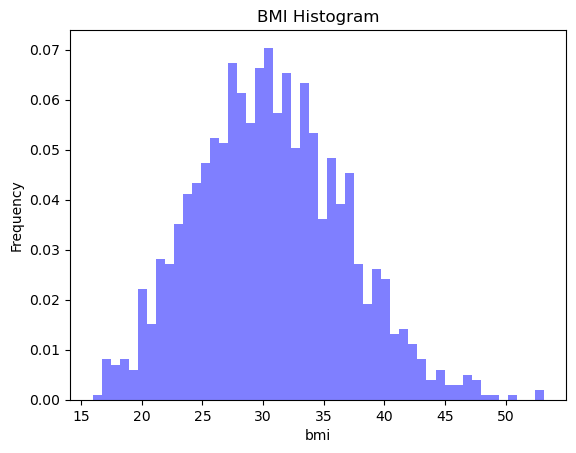

In [18]:
plt.hist(insurance_df["bmi"], bins=50, density=True, alpha=0.5, color='blue')

# add labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('BMI Histogram')

# show the plot
plt.show()

In [19]:
age_df=insurance_df.groupby(['age']).mean()
# Create a hvplot.scatter plot using x="bmi" and y="charges".
age_df.hvplot.scatter(x="age", y="charges")

:Scatter   [age]   (charges)

In [20]:
# Machine Learning

In [21]:
X = pd.get_dummies(insurance_df, columns= ['region', 'sex','smoker'])
X=X.drop(["ID"], axis=1)
X

age     bmi  children      charges  region_northeast  region_northwest  \
0      19  27.900         0  16884.92400                 0                 0   
1      18  33.770         1   1725.55230                 0                 0   
2      28  33.000         3   4449.46200                 0                 0   
3      33  22.705         0  21984.47061                 0                 1   
4      32  28.880         0   3866.85520                 0                 1   
...   ...     ...       ...          ...               ...               ...   
1333   50  30.970         3  10600.54830                 0                 1   
1334   18  31.920         0   2205.98080                 1                 0   
1335   18  36.850         0   1629.83350                 0                 0   
1336   21  25.800         0   2007.94500                 0                 0   
1337   61  29.070         0  29141.36030                 0                 1   

      region_southeast  region_southwest  sex_female  sex_male  smoker_no  \
0                    0                 1           1         0          0   
1                    1                 0           0         1          1   
2                    1                 0           0         1          1   
3                    0                 0           0         1          1   
4                    0                 0           0         1          1   
...                ...               ...         ...       ...        ...   
1333                 0                 0           0         1          1   
1334                 0                 0           1         0          1   
1335                 1                 0           1         0          1   
1336                 0                 1           1         0          1   
1337                 0                 0           1         0          0   

      smoker_yes  
0              1  
1              0  
2              0  
3              0  
4              0  
...          ...  
1333           0  
1334           0  
1335           0  
1336           0  
1337           1  

[1338 rows x 12 columns]

In [22]:
scaled = StandardScaler().fit_transform(X)
print(scaled[0:2])

[[-1.43876426 -0.45332    -0.90861367  0.2985838  -0.56526686 -0.56641788
  -0.61132367  1.76548098  1.0105187  -1.0105187  -1.97058663  1.97058663]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917 -0.56526686 -0.56641788
   1.63579466 -0.56641788 -0.98959079  0.98959079  0.5074631  -0.5074631 ]]


In [23]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
three_dimension = pca.fit_transform(scaled)
three_dimension

array([[ 1.79424704,  1.834668  , -0.79706524],
       [-0.62238015, -1.7483942 ,  1.62663949],
       [-0.41475711, -1.69092346,  1.61524341],
       ...,
       [-1.21359625,  0.9913069 ,  2.07577148],
       [-1.68281683,  1.07632861, -0.38151136],
       [ 2.55534191,  2.18771242, -1.09475868]])

In [24]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data = three_dimension, columns = ["PC 1", "PC 2", "PC 3"], index = insurance_df.index
)
pcs_df.head(10)

PC 1      PC 2      PC 3
0  1.794247  1.834668 -0.797065
1 -0.622380 -1.748394  1.626639
2 -0.414757 -1.690923  1.615243
3 -0.195383 -1.336715 -1.440494
4 -0.904619 -1.576005 -0.928444
5 -1.221139  1.139483  1.224181
6 -0.802360  1.192398  1.986637
7 -1.287002  1.211904 -0.844955
8 -0.593581 -1.535234 -0.932708
9 -0.308831  1.582409 -0.791436

In [25]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

C:\Users\rozap\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "


:Curve   [k]   (inertia)

In [26]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=1)


# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 1, 1, ..., 1, 3, 0])

In [27]:
# Create a new DataFrame including predicted clusters and insurance features.
# Concatentate the insurance_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([insurance_df, pcs_df], join= 'inner', axis= 1)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"]= model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(1338, 12)


age     sex     bmi  children smoker     region      charges      ID  \
0   19  female  27.900         0    yes  southwest  16884.92400  LFL038   
1   18    male  33.770         1     no  southeast   1725.55230  ZNOWKZ   
2   28    male  33.000         3     no  southeast   4449.46200  OIOJPO   
3   33    male  22.705         0     no  northwest  21984.47061  F4LI85   
4   32    male  28.880         0     no  northwest   3866.85520  ZFVE8D   
5   31  female  25.740         0     no  southeast   3756.62160  DQ6PGH   
6   46  female  33.440         1     no  southeast   8240.58960  F6AK30   
7   37  female  27.740         3     no  northwest   7281.50560  JRZCWC   
8   37    male  29.830         2     no  northeast   6406.41070  6NDZEU   
9   60  female  25.840         0     no  northwest  28923.13692  VWQKBM   

       PC 1      PC 2      PC 3  Class  
0  1.794247  1.834668 -0.797065      0  
1 -0.622380 -1.748394  1.626639      1  
2 -0.414757 -1.690923  1.615243      1  
3 -0.195383 -1.336715 -1.440494      2  
4 -0.904619 -1.576005 -0.928444      2  
5 -1.221139  1.139483  1.224181      3  
6 -0.802360  1.192398  1.986637      1  
7 -1.287002  1.211904 -0.844955      3  
8 -0.593581 -1.535234 -0.932708      2  
9 -0.308831  1.582409 -0.791436      3

In [28]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name= "ID",
    hover_data= ["age"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [29]:
# Create a hvplot.scatter plot using x="age" and y="charges".
clustered_df.hvplot.scatter(x="age", y="charges", by="Class", hover='ID')

:NdOverlay   [Class]
   :Scatter   [age]   (charges)

In [30]:
# Create a hvplot.scatter plot using x="bmi" and y="charges".
clustered_df.hvplot.scatter(x="bmi", y="charges", by="Class", hover='ID')

:NdOverlay   [Class]
   :Scatter   [bmi]   (charges)

In [31]:
# Supervised Learning

In [34]:
# Create our features
insurance2_df=insurance_df.drop(["charges","ID"], axis=1)
X=pd.get_dummies(insurance2_df, columns= ['region', 'sex','smoker'])
cols = X.columns


# Create our target
y = insurance_df[['charges']]
X.head()

charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [40]:
# Calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  37068872.05385133


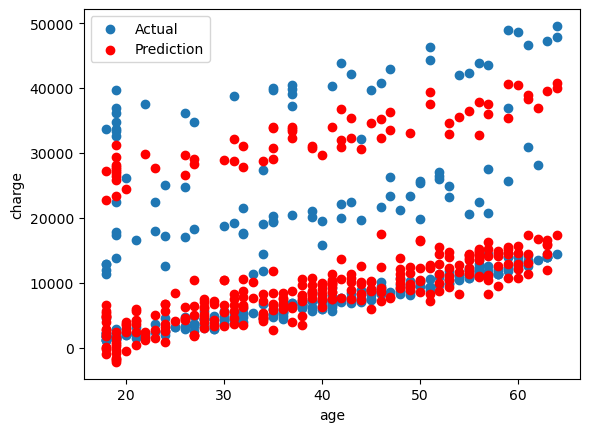

In [41]:
plt.scatter(X_test["age"], y_test, label='Actual')
plt.scatter(X_test["age"], y_pred, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

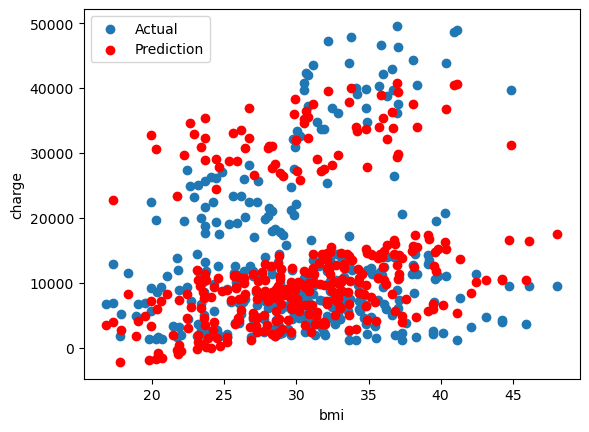

In [42]:
plt.scatter(X_test["bmi"], y_test, label='Actual')
plt.scatter(X_test["bmi"], y_pred, color='red', label='Prediction')
plt.xlabel('bmi')
plt.ylabel('charge')
# Add a legend to the plot
plt.legend()
plt.show()

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  41378968.584639356


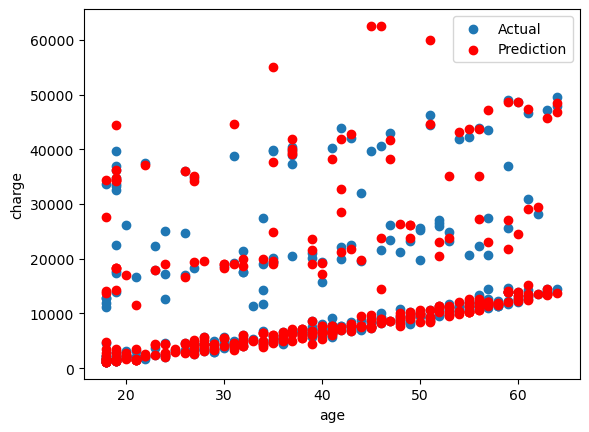

In [44]:
plt.scatter(X_test["age"], y_test, label='Actual')
plt.scatter(X_test["age"], y_pred, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

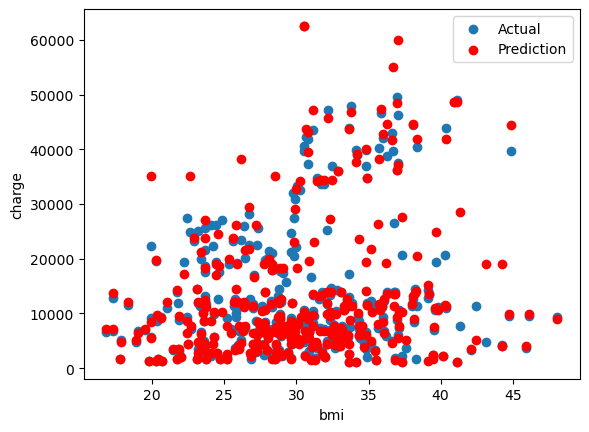

In [45]:
plt.scatter(X_test["bmi"], y_test, label='Actual')
plt.scatter(X_test["bmi"], y_pred, color='red', label='Prediction')
plt.xlabel('bmi')
plt.ylabel('charge')
# Add a legend to the plot
plt.legend()
plt.show()

In [59]:
from sklearn.ensemble import RandomForestRegressor
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  29639376.24747555


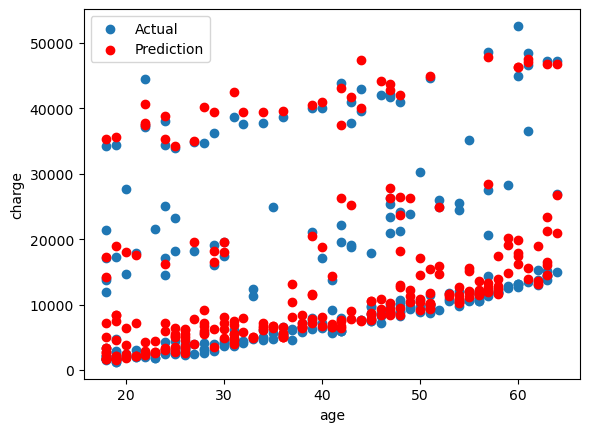

In [60]:
plt.scatter(X_test["age"], y_test, label='Actual')
plt.scatter(X_test["age"], y_pred, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

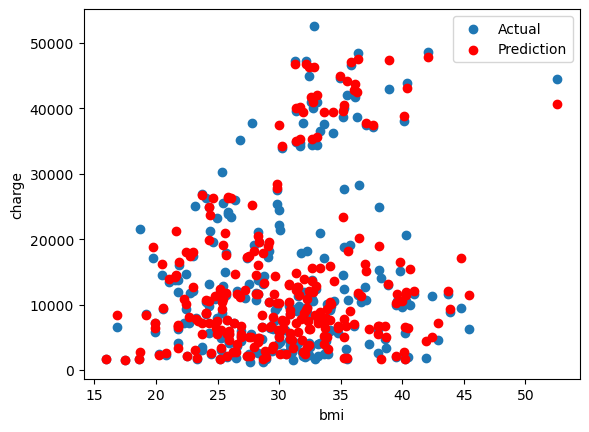

In [61]:
plt.scatter(X_test["bmi"], y_test, label='Actual')
plt.scatter(X_test["bmi"], y_pred, color='red', label='Prediction')
plt.xlabel('bmi')
plt.ylabel('charge')
# Add a legend to the plot
plt.legend()
plt.show()

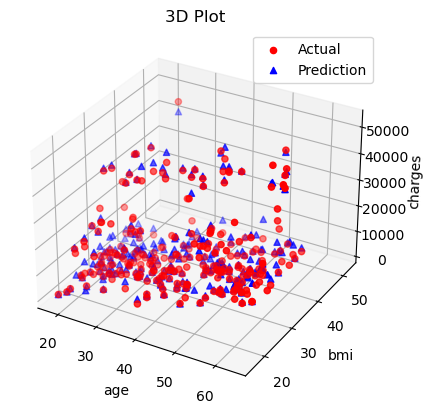

In [62]:
#trying 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first set of data
ax.scatter(X_test["age"],X_test["bmi"], y_test, c='r', marker='o', label='Actual')

# Plot the second set of data
ax.scatter(X_test["age"],X_test["bmi"], y_pred, c='b', marker='^', label='Prediction')

# Add axis labels and a title
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')
ax.set_title('3D Plot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [63]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [64]:
import seaborn as sns
# Transfer data to numeric data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)

label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)

label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

insurance_df.head()



age  sex     bmi  children  smoker  region      charges      ID
0   19    0  27.900         0       1       3  16884.92400  LFL038
1   18    1  33.770         1       0       2   1725.55230  ZNOWKZ
2   28    1  33.000         3       0       2   4449.46200  OIOJPO
3   33    1  22.705         0       0       1  21984.47061  F4LI85
4   32    1  28.880         0       0       1   3866.85520  ZFVE8D

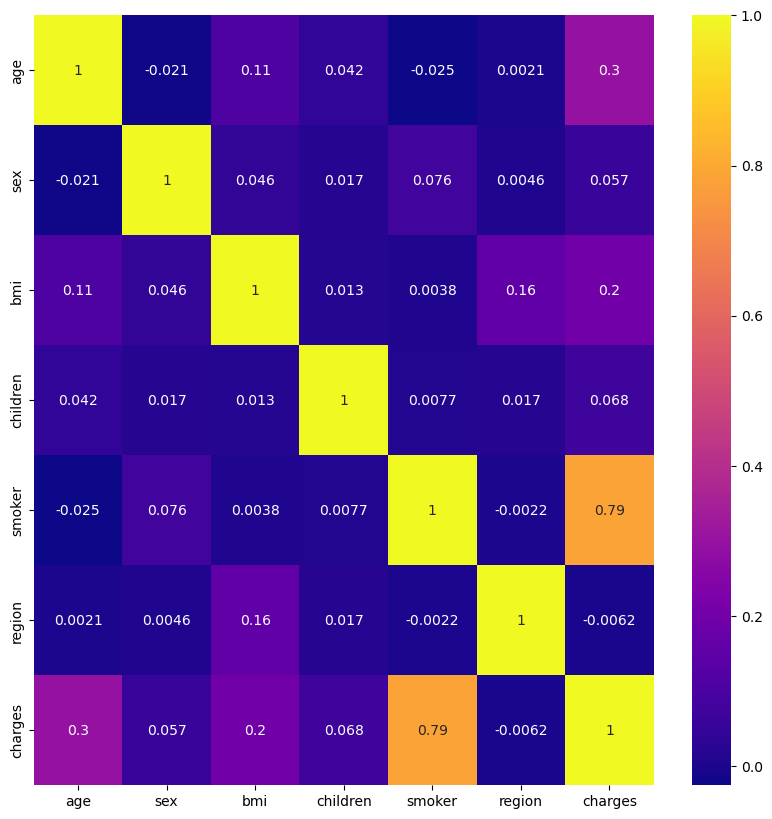

In [65]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_df.corr(), annot=True, cmap='plasma')

In [66]:
insurance_df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [67]:
X=insurance_df.drop(["region","ID","charges"],axis=1)
y = insurance_df[['charges']]

y.head()

charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  29674932.287089735


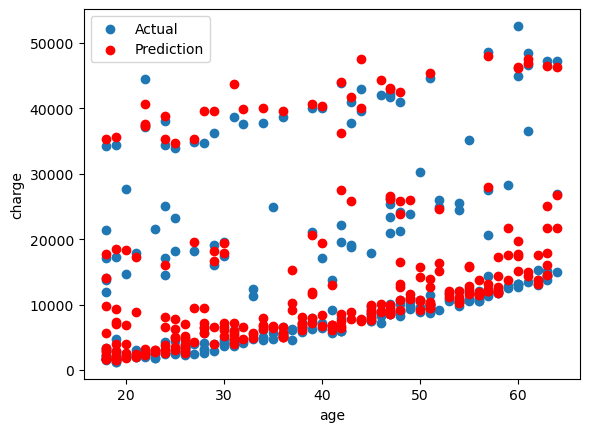

In [71]:
plt.scatter(X_test["age"], y_test, label='Actual')
plt.scatter(X_test["age"], y_pred, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

C:\Users\rozap\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\rozap\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of charges for non-smokers')

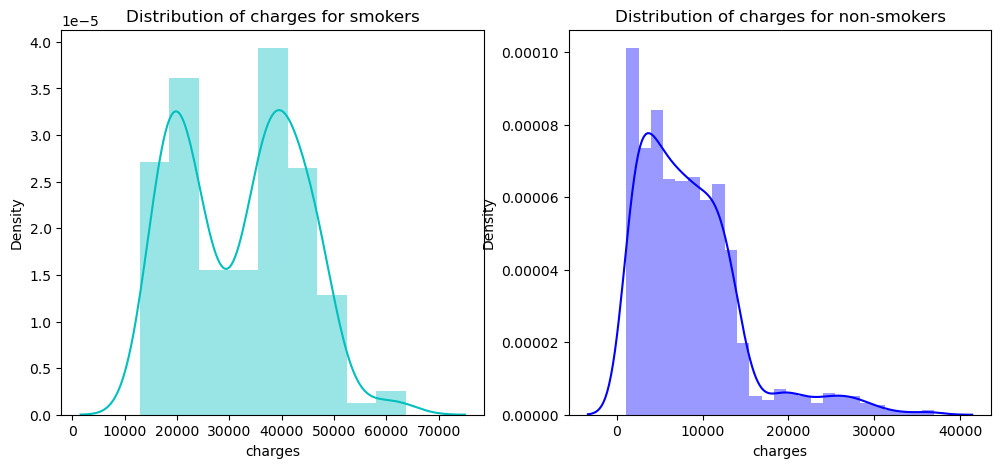

In [72]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insurance_df[(insurance_df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insurance_df[(insurance_df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'The number of smokers and non-smokers')

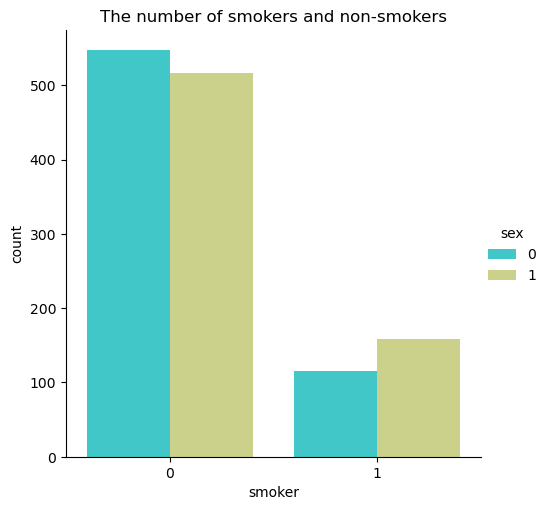

In [73]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=insurance_df)
plt.title("The number of smokers and non-smokers")


Text(0, 0.5, 'charge')

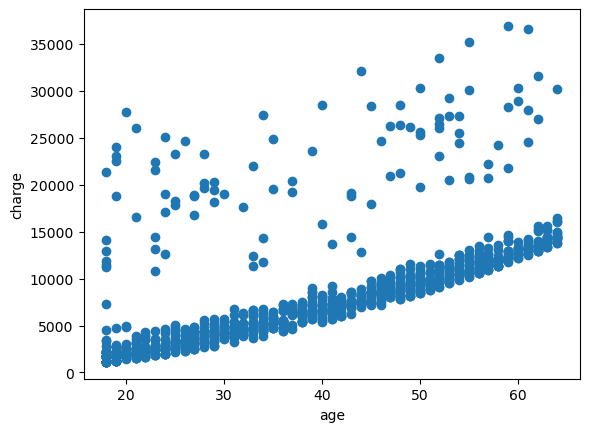

In [85]:
#non - smokers
plt.scatter(x=insurance_df[(insurance_df.smoker == 0)].age,y=insurance_df[(insurance_df.smoker == 0)].charges)
plt.xlabel('age')
plt.ylabel('charge')

Text(0, 0.5, 'charge')

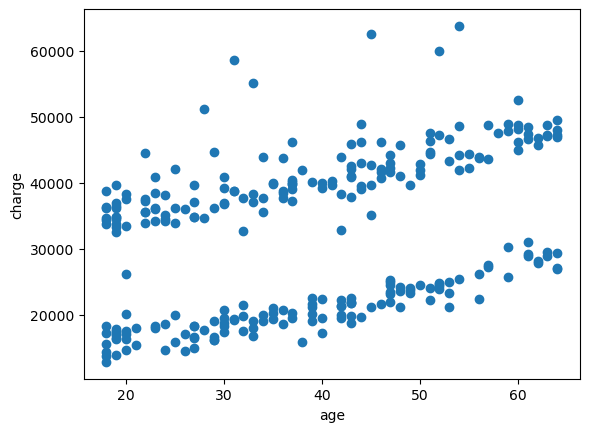

In [84]:
#smokers
plt.scatter(x=insurance_df[(insurance_df.smoker == 1)].age,y=insurance_df[(insurance_df.smoker == 1)].charges)
plt.xlabel('age')
plt.ylabel('charge')

In [76]:
label.fit(clustered_df.sex.drop_duplicates())
clustered_df.sex = label.transform(clustered_df.sex)

label.fit(clustered_df.smoker.drop_duplicates())
clustered_df.smoker = label.transform(clustered_df.smoker)

label.fit(clustered_df.region.drop_duplicates())
clustered_df.region = label.transform(clustered_df.region)
clustered_df.head()

age  sex     bmi  children  smoker  region      charges      ID      PC 1  \
0   19    0  27.900         0       1       3  16884.92400  LFL038  1.794247   
1   18    1  33.770         1       0       2   1725.55230  ZNOWKZ -0.622380   
2   28    1  33.000         3       0       2   4449.46200  OIOJPO -0.414757   
3   33    1  22.705         0       0       1  21984.47061  F4LI85 -0.195383   
4   32    1  28.880         0       0       1   3866.85520  ZFVE8D -0.904619   

       PC 2      PC 3  Class  
0  1.834668 -0.797065      0  
1 -1.748394  1.626639      1  
2 -1.690923  1.615243      1  
3 -1.336715 -1.440494      2  
4 -1.576005 -0.928444      2

In [82]:
X=clustered_df.drop(["ID","PC 1","PC 2","PC 3","charges"],axis=1)
Y=clustered_df[["charges"]]
Y = np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  22796430.372251682


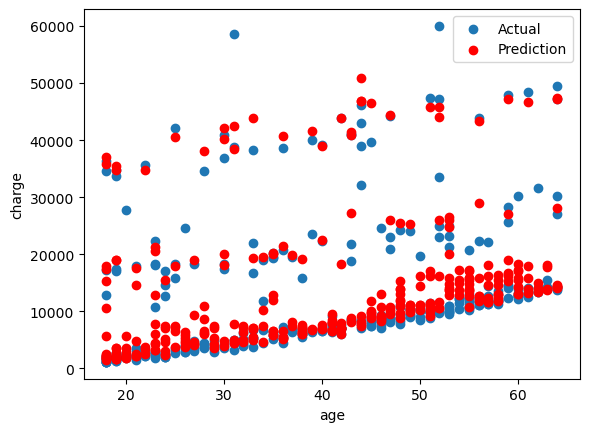

In [83]:
plt.scatter(X_test["age"], y_test, label='Actual')
plt.scatter(X_test["age"], y_pred, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()